<a href="https://colab.research.google.com/github/Frediwincode/Machine-Learning/blob/main/US%20University%20Category/Unsupervised%20Learning/PCA%26K-Means_Fredie%20Jin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4
In this homework we are working with a dataset of American universities, aggregated from government statistics. The dataset contains a large number of columns covering financial details, enrollment details, and so on. We will be using unsupervised dimensionality reduction to discover which features are highly related, and then using unsupervised clustering to discover which colleges are most similar.

# Initial Data Fetching and Setup

In [ ]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1lPoKPVXt9glGvBlxA-lwZDtmpyUsvIpL' -O colleges.csv


--2025-03-26 14:16:38--  https://docs.google.com/uc?export=download&id=1lPoKPVXt9glGvBlxA-lwZDtmpyUsvIpL
Resolving docs.google.com (docs.google.com)... 142.251.8.138, 142.251.8.139, 142.251.8.101, ...
Connecting to docs.google.com (docs.google.com)|142.251.8.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lPoKPVXt9glGvBlxA-lwZDtmpyUsvIpL&export=download [following]
--2025-03-26 14:16:38--  https://drive.usercontent.google.com/download?id=1lPoKPVXt9glGvBlxA-lwZDtmpyUsvIpL&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.174.132, 2404:6800:4008:c1b::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.174.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1122328 (1.1M) [application/octet-stream]
Saving to: ‘colleges.csv’

colleges.csv        100%[===================>]   1.07M  --.-KB/s    in 0.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%pushd "/content/drive/MyDrive/MSSP6080/assignment 3"

Mounted at /content/drive
/content/drive/MyDrive/MSSP6080/assignment 3


['/content']

In [ ]:
# Preparation

import pandas as pd
import numpy as np

input_file = pd.read_csv("colleges.csv")
#import our dataset

print(input_file.shape)
#still check the shape of dataset: how many colleges? how many predictors?
print(input_file.columns) #check all the variables

input_file_clean = {
    "Institution name": input_file["Institution name"]
}
#prepare a clean dataset with only the information of college names

#In this step, we cannot check the shape of the dictionary input_clean, since
#'dict' object has no attribute 'shape', 'head' etc.
# only DataFrame (list) has such attribute.
#also, dict is just a temporary space to store the data, we would create DataFrame later


(3815, 77)
Index(['Institution name', 'Number of Applicants', 'Number Admitted',
       'Number Admitted who Enrolled', 'Percent of Applicants Admitted',
       'Percent Admitted who Enrolled', 'Undergraduate total_Full time - Men',
       'Undergraduate total_Full time - Women',
       'Undergraduate total_Full time - Total',
       'Undergraduate total_Part time - Men',
       'Undergraduate total_Part time - Women',
       'Undergraduate total_Part time - Total',
       'Undergraduate total_Grand Total', 'Graduate_Full time - Men',
       'Graduate_Full time - Women', 'Graduate_Full time - Total',
       'Graduate_Part time - Men', 'Graduate_Part time - Women',
       'Graduate_Part time - Total', 'Graduate_Grand Total',
       'All students total_Full time - Men',
       'All students total_Full time - Women',
       'All students total_Full time - Total',
       'All students total_Part time - Men',
       'All students total_Part time - Women',
       'All students total_Part tim

In [ ]:
for column in input_file.loc[:, input_file.columns[1:]]:#means skipping the first columns the dataset which is the text "name of college"

  clean_column = [] #prepare an empty list to store the clean dataset
  original_column = input_file[column].replace("-", None) #transfer the null value in this dataset into the valid name

  for x in original_column: #process each column of the dataset
    try:
      clean_column.append(float(x)) #try to turn each column of dataset into float, which is a datatype of number; if success, add them into the clean lists
    except:
      clean_column.append(None) #if failed, add "None" at the end of the row, to show that the column of data is invalid or null

  input_file_clean[column] = clean_column #put these numeric data columns into the clean dict created

df = pd.DataFrame(input_file_clean) #transform the dict into DataFrame

df = df.dropna()#drop null values

df.head()#check the head

#In this part, I did a data cleaning:

# Read in the raw data; select the "school name" column and leave it;
# For each row: Replace "-" with None; try to convert to numbers;
#    If it cannot be transformed, it is marked as null;
# Place all the processed columns into a clean dataframe;
# Delete all rows with missing data;


# Now I have a numeric and clean dataset for further analysis


,Institution name,Number of Applicants,Number Admitted,Number Admitted who Enrolled,Percent of Applicants Admitted,Percent Admitted who Enrolled,Undergraduate total_Full time - Men,Undergraduate total_Full time - Women,Undergraduate total_Full time - Total,Undergraduate total_Part time - Men,...,Graduate_Nonresident alien,Total_American Indian or Alaska Native,Total_Asian,Total_Black or African American,Total_Hispanic or Latino,Total_Native Hawaiian or Other Pacific Islander,Total_White,Total_Two or more races,Total_Race/ethnicity unknown,Total_Nonresident alien
1,University of Alabama at Birmingham,7845.0,7226.0,2299.0,0.921,0.318,3988.0,6054.0,10042.0,1431.0,...,701.0,59.0,1305.0,4795.0,672.0,6.0,12920.0,828.0,289.0,1049.0
2,University of Alabama in Huntsville,4543.0,3674.0,1435.0,0.809,0.391,3678.0,2715.0,6393.0,743.0,...,270.0,97.0,364.0,946.0,458.0,6.0,6788.0,245.0,383.0,449.0
3,Alabama State University,7783.0,7607.0,1038.0,0.977,0.136,1332.0,2311.0,3643.0,116.0,...,18.0,5.0,22.0,4017.0,43.0,2.0,171.0,44.0,51.0,58.0
4,The University of Alabama,37302.0,22032.0,6663.0,0.591,0.302,13333.0,16253.0,29586.0,1253.0,...,543.0,139.0,466.0,4038.0,1831.0,42.0,29168.0,1242.0,240.0,1224.0
6,Auburn University at Montgomery,5941.0,5514.0,757.0,0.928,0.137,1209.0,2345.0,3554.0,390.0,...,53.0,20.0,119.0,2102.0,62.0,3.0,2280.0,268.0,82.0,275.0



## Question 1 *(4 points)*

Manually choose four different subsets of features (select features which fall into the below categories), each of which represents one concept about the colleges in this list. You do not need to use a large number of features, just enough to represent (by hand) the concept you are trying to approximate.

| Feature Set | Description                                                               |
|-------------|---------------------------------------------------------------------------|
| Size        | Features representing the size of a university.                |
| Selectivity | Features representing the difficulty of being admitted and/or graduating. |
| Diversity   | Features representing the breadth of  representation in the student body.              |
| **You choose**   | One additional concept that you decide to investigate.             |


### Answer 1

**Size**: Features representing the size of a university.

*   (Undergraduate total_Grand Total)
*   (Graduate_Grand Total)
*   (All students total_Grand Total)
*   (All full-time instructional staff)



**Selectivity**: Features representing the difficulty of being admitted and/or graduating.

*   (Percent of Applicants Admitted)
*   (Graduation rate (%))
*  (（Transfer-out rate (%))

**Diversity**: Features representing the breadth of representation in the student body. There, I use race as the criteria. (P.S. Total_Race/ethnicity unknown is not included)

*   (Total_White)
*   (Total_Asian)
*   (Total_Black or African American)
*   (Total_Hispanic or Latino)
*   (Total_Native Hawaiian or Other Pacific Islander)
*   (Total_American Indian or Alaska Native)
*   (Total_Two or more races)
*   (Total_Nonresident alien)


**Academic preparation of Admitted Students**: Use SAT percentile scores to measure the academic level of admitted students when they entered the universities.

*   (SAT I Verbal - 25th Percentile)
*   (SAT I Verbal - 75th Percentile)
*   (SAT I Math - 25th Percentile)
*   (SAT I Math - 75th Percentile)

In [ ]:
# Here are the categories followed by the selected variables

manual_selected_columns = [
    # Size
    'Undergraduate total_Grand Total',
    'Graduate_Grand Total',
    'All students total_Grand Total',
    'All full-time instructional staff',

    # Selectivity
    'Percent of Applicants Admitted',
    'Graduation rate (%)',
    'Transfer-out rate (%)',

    # Diversity
    'Total_White ',
    'Total_Asian ',
    'Total_Black or African American ',
    'Total_Hispanic or Latino',
    'Total_Native Hawaiian or Other Pacific Islander ',
    'Total_American Indian or Alaska Native ',
    'Total_Two or more races ',
    'Total_Nonresident alien ',

    # Academic Preparation
    'SAT I Verbal - 25th Percentile',
    'SAT I Verbal - 75th Percentile',
    'SAT I Math - 25th Percentile',
    'SAT I Math - 75th Percentile',
]

## Question 2. *(14 points total)*



### Task 2.1 Normalization *(2 points)*
Normalized the features in the university dataset. Each feature in the resulting data frame should be normalized to a value between 0 and 1. Save this normalized representation to a variable named `df_norm`.

In [ ]:
# Drop the institution name
df_wait = df.drop(columns=["Institution name"]) # This is because the name of colleges
# are string types, which could be used for numeric calculation. Don't worry, we would
# add them back as the index.

from sklearn.preprocessing import MinMaxScaler
#MinMaxScaler is a tool to normalize the value between 0 and 1

# Set X equals to all features
X = df_wait.loc[:, df_wait.columns]
#there, I extract all the columns after dropping the college name in the df, and place them in X.

# Normalize with MinMaxScaler
mms = MinMaxScaler()
# the algorithm behind: in each column, every new value = (original value - min value of the column) / (max value of the column - min value of the column)
df_norm = pd.DataFrame(mms.fit_transform(X), columns=df_wait.columns) #place the normalized result into the new DataFrame df_norm
# mms.fit_transform(X) would learn the max and min of each column


# Add back Institution name as index
df_norm.index = df["Institution name"]

display(df_norm)

#Now, we have normalized features all with a value between 0 and 1. We have to do this since it's terrible for
#PCA and K-means if the values have different measurement: we cannot make PCA and K-means among 0.1 and 100,000.
#Thus, PCA and K-means needs normalized values.

,Number of Applicants,Number Admitted,Number Admitted who Enrolled,Percent of Applicants Admitted,Percent Admitted who Enrolled,Undergraduate total_Full time - Men,Undergraduate total_Full time - Women,Undergraduate total_Full time - Total,Undergraduate total_Part time - Men,Undergraduate total_Part time - Women,...,Graduate_Nonresident alien,Total_American Indian or Alaska Native,Total_Asian,Total_Black or African American,Total_Hispanic or Latino,Total_Native Hawaiian or Other Pacific Islander,Total_White,Total_Two or more races,Total_Race/ethnicity unknown,Total_Nonresident alien
Institution name,,,,,,,,,,,,,,,,,,,,,
University of Alabama at Birmingham,0.066914,0.207538,0.201699,0.917104,0.345144,0.160819,0.261824,0.207093,0.155167,0.201658,...,0.079623,0.042972,0.108533,0.367405,0.018053,0.025641,0.328252,0.329880,0.013965,0.073326
University of Alabama in Huntsville,0.037822,0.102288,0.123622,0.799580,0.440945,0.148318,0.113675,0.129643,0.080409,0.045458,...,0.030668,0.070648,0.030273,0.072485,0.012304,0.025641,0.172459,0.097610,0.018507,0.031385
Alabama State University,0.066368,0.218828,0.087746,0.975866,0.106299,0.053714,0.095749,0.071274,0.012279,0.012048,...,0.002045,0.003642,0.001830,0.307793,0.001155,0.008547,0.004345,0.017530,0.002464,0.004054
The University of Alabama,0.326438,0.646261,0.596060,0.570829,0.324147,0.537664,0.714349,0.621917,0.135825,0.186790,...,0.061677,0.101238,0.038756,0.309402,0.049189,0.179487,0.741057,0.494821,0.011597,0.085559
Auburn University at Montgomery,0.050139,0.156809,0.062353,0.924449,0.107612,0.048754,0.097258,0.069385,0.042052,0.058532,...,0.006020,0.014567,0.009897,0.161060,0.001666,0.012821,0.057927,0.106773,0.003962,0.019223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
California State University-Monterey Bay,0.107247,0.208842,0.084312,0.564533,0.108924,0.088918,0.163723,0.122320,0.034663,0.028711,...,0.001590,0.013110,0.033516,0.022450,0.092413,0.145299,0.048222,0.161753,0.030201,0.029568
Augusta University,0.024704,0.065871,0.091993,0.791186,0.510499,0.061053,0.122105,0.087745,0.044659,0.053576,...,0.008746,0.007283,0.062542,0.135469,0.016280,0.042735,0.117353,0.162151,0.007296,0.009437
Middle Georgia State University,0.018184,0.056477,0.122086,0.916055,0.801837,0.087225,0.109681,0.095577,0.112898,0.149620,...,0.001704,0.008740,0.018380,0.206957,0.010531,0.038462,0.102337,0.112749,0.001643,0.008528


### Task 2.2 Unsupervised Features *(6 points)*
Using principal component analysis on `df_norm`, generate a dimensionality-reduced representation of the university dataset.

2.2.1 Vary the number of components from 2 to 10. What percentage of variance is explained at each number of components?




2 components: 0.6418 variance explained
3 components: 0.7186 variance explained
4 components: 0.7597 variance explained
5 components: 0.7932 variance explained
6 components: 0.8234 variance explained
7 components: 0.8479 variance explained
8 components: 0.8691 variance explained
9 components: 0.8854 variance explained
10 components: 0.9005 variance explained


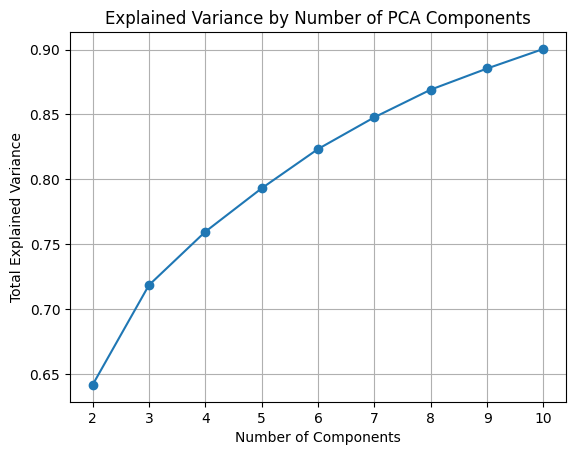

In [ ]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

# Create an empty list to store how much variances (the indicator of information explained) explained by the settings of different numbers of components.
explained_variances = []

for i in range(2, 11): #try settings of 2 to 10 components
  pca = PCA(n_components = i)
  pca.fit(df_norm) #use the normalized dataset "df_norm" to train the PCA model
  explained_variances.append(pca.explained_variance_ratio_.sum())
  #.explained_variance_ratio_: means variance explained by every compenonent；
  #.sum(): the cumulative variance ratio

# print the cumulative variance ratio by every setting
for i, var in enumerate(explained_variances, start=2):
    print(f"{i} components: {var:.4f} variance explained")

# draw the plot to visualize
plt.plot(range(2, 11), explained_variances, marker='o')
plt.title("Explained Variance by Number of PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Total Explained Variance")
plt.grid(True)
plt.show()

2.2.2 Set the number of components to 4. Which features load together with high weight in each component? Make sure to explore each componenet individually

（P.S. The reason why the number of components is 4 could be valid in the 2.2.1 where we could notice that there is no significant difference after 4)

**Addtional explanation of PCA...**

Let's say I have three characteristics: Apple, Pear, Grape

The job of PCA is to: Recombine these three features into some new "virtual features", such as Component 1, Component 2...

These new features are a weighted combination of the original features, i.e. :

Component 1 = a * Apple + b * Pear + c * Grape


Here a, b, and c are the "weights" of these three features in Component 1.

When applying

pca = PCA(n_components=4)
pca.fit(df_norm)

Pca.components_ is just a matrix that looks like this:

[ 0.5   0.6  -0.3  ...]   <-- Component 1

[-0.2   0.7   0.4  ...]   <-- Component 2

[ 0.1  -0.1   0.9  ...]   <-- Component 3

[ 0.3   0.2  -0.8  ...]  <-- Component 4

(example)

Each row = a principal component;

Each column = the weight of the original feature

What is pca.components_[0]? (example)


That's the entire row of the first Component 1:

[ 0.5   0.6  -0.3  ... ]

The weight of each orignal feature in Component 1.

In [ ]:
#Exploring Component 1

pca = PCA(n_components = 4)
components = pca.fit_transform(df_norm)
#Each row is now 4-dimensional, stored in components

factors = pd.DataFrame({
    "Features": df_norm.columns, #the name of the original features
    "Component 1": pca.components_[0] #the weight of each original feature in component 1
})
factors.sort_values("Component 1", ascending=False, ignore_index=True, inplace=True)
#ascending=False: the biggest weight is at the front
#ignore_index=True : The original line number is not retained
#inplace=True: Indicates that the factors table is modified in situ and no new table is generated.

print(f"The top 3 in Component 1 are {factors.iloc[0, 0]}, {factors.iloc[1, 0]}, and {factors.iloc[2, 0]}.") #print the

The top 3 in Component 1 are All students total_Full time - Women, Total_Two or more races , and Undergraduate total_Full time - Women.


In [ ]:
#Exploring Component 2

pca = PCA(n_components=4)
components = pca.fit_transform(df_norm)

factors = pd.DataFrame({
    "Features": df_norm.columns,
    "Component 2": pca.components_[1]
})
factors.sort_values("Component 2", ascending=False, ignore_index=True, inplace=True)

print(f"The top 3 in Component 2 are {factors.iloc[0, 0]}, {factors.iloc[1, 0]}, and {factors.iloc[2, 0]}.")

The top 3 in Component 2 are In-state - Percent, Transfer-out rate (%), and Percent of Applicants Admitted.


In [ ]:
#Exploring Component 3
pca = PCA(n_components=4)
components = pca.fit_transform(df_norm)

factors = pd.DataFrame({
    "Features": df_norm.columns,
    "Component 3": pca.components_[2]
})
factors.sort_values("Component 3", ascending=False, ignore_index=True, inplace=True)

print(f"The top 3 in Component 3 are {factors.iloc[0, 0]}, {factors.iloc[1, 0]}, and {factors.iloc[2, 0]}.")

The top 3 in Component 3 are Students submitting SAT scores - Percent, Graduation rate (%), and Students submitting SAT scores - Number.


In [ ]:
#Exploring Component 4
pca = PCA(n_components=4)
components = pca.fit_transform(df_norm)

factors = pd.DataFrame({
    "Features": df_norm.columns,
    "Component 4": pca.components_[3]
})
factors.sort_values("Component 4", ascending=False, ignore_index=True, inplace=True)

print(f"The top 3 in Component 4 are {factors.iloc[0, 0]}, {factors.iloc[1, 0]}, and {factors.iloc[2, 0]}.")

The top 3 in Component 4 are Graduation rate (%), Undergraduate_White , and Number Admitted.


### Task 2.3. Unsupervised Clusters (6 points)
Tune a K-means cluster model on this dataset, using the features from `df_norm`. In particular, tune the number of clusters *K* to a level that, in your best judgment, produces representative clusters and appropriate complexity.


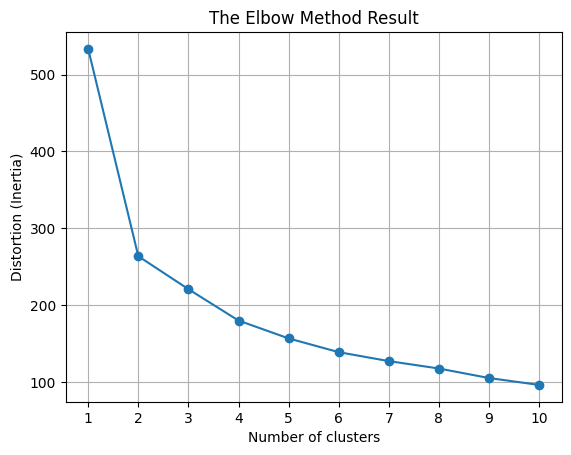

In [ ]:
from sklearn.cluster import KMeans


# Create condensed_df for K-means clustering, using the name of universities as the index
condensed_df = pd.DataFrame(components, index=df_norm.index)

# Elbow method to find optimal K
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300)
    km.fit(condensed_df) #fit the model
    distortions.append(km.inertia_)
#km.inertia_: "sum of squares of error within the group after clustering", the smaller the better;


# Drawing to look at where the "elbow" is and choose it as the optimal K value
K = range(1, 11)
plt.plot(K, distortions, marker='o')
plt.xticks(K)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion (Inertia)')
plt.title('The Elbow Method Result')
plt.grid(True)
plt.show()

In [ ]:
# After choosing the optimal K, which equals to 3 from elbow method in the last step, the final model is:
km = KMeans(n_clusters=3,
            init='k-means++',
            n_init=10,
            max_iter=300)

# make prediction of the university catogories. This would put labels on every univeristy, to see which culster it falls in.
df["Cluster_Prediction"] = km.fit_predict(condensed_df)

# print representative feature for each cluster.
for i in range(0, 3):
    df_i = df.loc[df["Cluster_Prediction"] == i]
    print(f"Cluster {i+1} stats:")
    print(f"Percentage of all data: {round(100*len(df_i)/len(df), 2)}%")
    print(f"Average percent of applicants admitted: {round(100*np.mean(df_i['Percent of Applicants Admitted']), 2)}")
    print(f"Average total number of undergrads: {round(np.mean(df_i['Undergraduate_Total']), 2)}")
    print(f"Average 75th percentile marker for SAT I Math: {round(np.mean(df_i['SAT I Math - 75th Percentile']), 2)}")
    print(f"Average percent of in-state students: {round(100*np.mean(df_i['In-state - Percent']), 2)}")
    print()


Cluster 1 stats:
Percentage of all data: 70.32%
Average percent of applicants admitted: 69.41
Average total number of undergrads: 4057.57
Average 75th percentile marker for SAT I Math: 598.72
Average percent of in-state students: 68.73

Cluster 2 stats:
Percentage of all data: 11.64%
Average percent of applicants admitted: 55.35
Average total number of undergrads: 29644.2
Average 75th percentile marker for SAT I Math: 686.31
Average percent of in-state students: 72.54

Cluster 3 stats:
Percentage of all data: 18.04%
Average percent of applicants admitted: 69.83
Average total number of undergrads: 17060.63
Average 75th percentile marker for SAT I Math: 612.25
Average percent of in-state students: 84.76



## Question 3 *(6 points)*

**3.1) What number of clusters did you choose, and what was your evaluation process for choosing that value?**


In K-means clustering, I chose 3 clusters based on elbow method, which would visualize the certain value when there is huge reduction in distortion and after the value the distortion does not go down that quickly in the plot representing the distortion of different numbers of clusters. Specifically, in the plot, I noticed that when K equals to 3, the reduction of cluster distortion slows down, and that's the reason why I choose 3 clusters.


**3.2) Do the sets of features you chose manually align with the principal components** and/**or clusters you discovered?**

The four categories I manually selected includes **(1) university size** (e.g., number of full-time undergraduates, number of graduates), **(2) selectivity** (percent of applicants admitted, graduation rate(%)), **(3) diversity** (race), and **(4) academic preparation when entering universities** (SAT scores).

(a) In PCA automatic selection, there are several variables that I selected. In component 4, transfer-out rate(%), percent of applicants admitted and graduation rate(%) were all manually selected by me in the Selectivity. In Component, Total_Two or more races appears, whic is the same variable I used in Diversity. Therefore, there is consistency between the PCA results and the variables I manually selected.

However, there are also variables in PCA which are not covered by my manual selection, e.g., the in-state/out-of-state distribution and gender.

(b) The K-means clustering is based on the data after PCA dimensionality reduction rather than the original variables, and the features are provided by Sadiq to help us understand the differences between different types of universities. In K-means clustering, the clustering differentiation is reflected in variables of percent of applicants admitted, number of undergraduates, SAT Math (75th percentile). This is aligned with my manual selection of university size and academic preparation, indicating the consistency between K-means clustering  and the variables I manually selected.

However, just as PCA, proportion of in-state students is not covered by my manual selection.

***There is one thing that I'm curious aboout:*** are the selected features of K-means clustering based on the distribution after clustering, or are they decided by Sadiq based on experience? This made me realize that the interpretation after K-means clustering can not be separated from the manually defined criteria.




**3.3) What additional features, not present in this data, would be useful to group together similar universities using unsupervised learning?**

Based on my experiences when admitted by UPenn, factors such as a university's reputation, major ranking and alumni network, would also be crucial, even more direct than any other factors presented in the data. However, these factors are somewhat hard to quantify. Still, we could refer to the US News ranking or QS ranking to catogorize universities, like the Top 10, Top 20, Top 50, or Top 100.

